In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib as plt
import numpy as np
import pandas as pd
import itertools

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.svm import SVC

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions  # Import plot_decision_regions from mlxtend

In [ ]:
pip install numpy pandas scikit-learn tensorflow

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('/content/mhealth_raw_data.csv')

# Display dataset information to understand its structure
print(data.head())
print(data['Activity'].value_counts())

      alx     aly      alz       glx      gly      glz     arx     ary  \
0  2.1849 -9.6967  0.63077  0.103900 -0.84053 -0.68762 -8.6499 -4.5781   
1  2.3876 -9.5080  0.68389  0.085343 -0.83865 -0.68369 -8.6275 -4.3198   
2  2.4086 -9.5674  0.68113  0.085343 -0.83865 -0.68369 -8.5055 -4.2772   
3  2.1814 -9.4301  0.55031  0.085343 -0.83865 -0.68369 -8.6279 -4.3163   
4  2.4173 -9.3889  0.71098  0.085343 -0.83865 -0.68369 -8.7008 -4.1459   

        arz      grx     gry       grz  Activity   subject  
0  0.187760 -0.44902 -1.0103  0.034483         0  subject1  
1  0.023595 -0.44902 -1.0103  0.034483         0  subject1  
2  0.275720 -0.44902 -1.0103  0.034483         0  subject1  
3  0.367520 -0.45686 -1.0082  0.025862         0  subject1  
4  0.407290 -0.45686 -1.0082  0.025862         0  subject1  
Activity
0     804864
1      27648
2      27648
3      27648
4      27648
9      27648
10     27648
11     27648
5      27505
7      26676
8      26470
6      25857
12      9318
Name: count

In [ ]:
duplicate_count = data.duplicated().sum()

print("Number of duplicate records:", duplicate_count)

Number of duplicate records: 0


In [ ]:
null_counts = data.isnull().sum()

print("Null value counts in each column:")
print(null_counts)

Null value counts in each column:
alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64


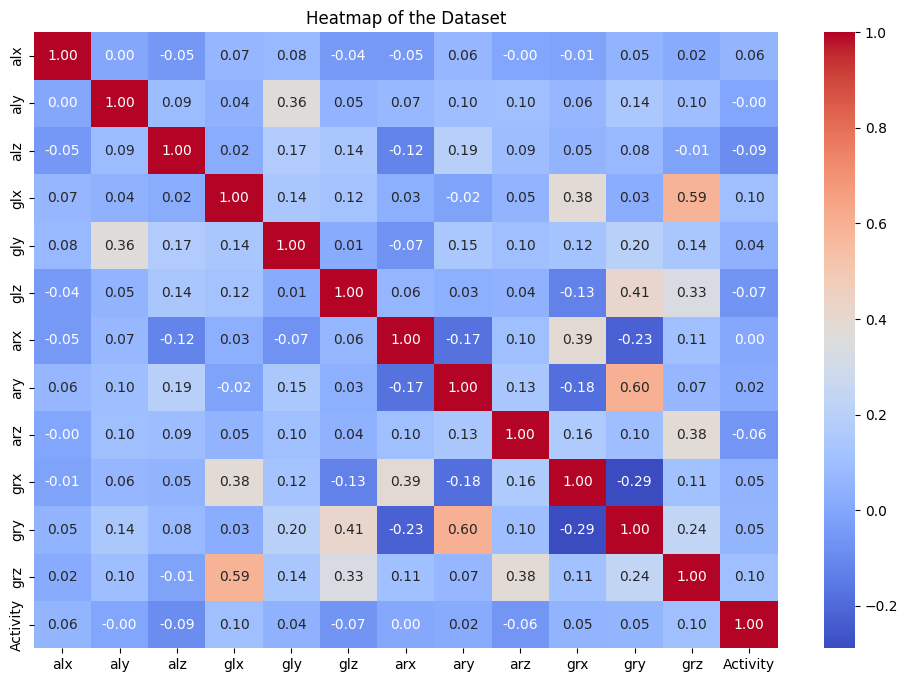

In [ ]:
numeric_columns = data.select_dtypes(include=['int', 'float'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of the Dataset')
plt.show()

In [ ]:
import pandas as pd

# Assuming 'activity' is the column with the class labels
sampled_data = data.groupby('Activity').apply(lambda x: x.sample(n=7000, random_state=42)).reset_index(drop=True)


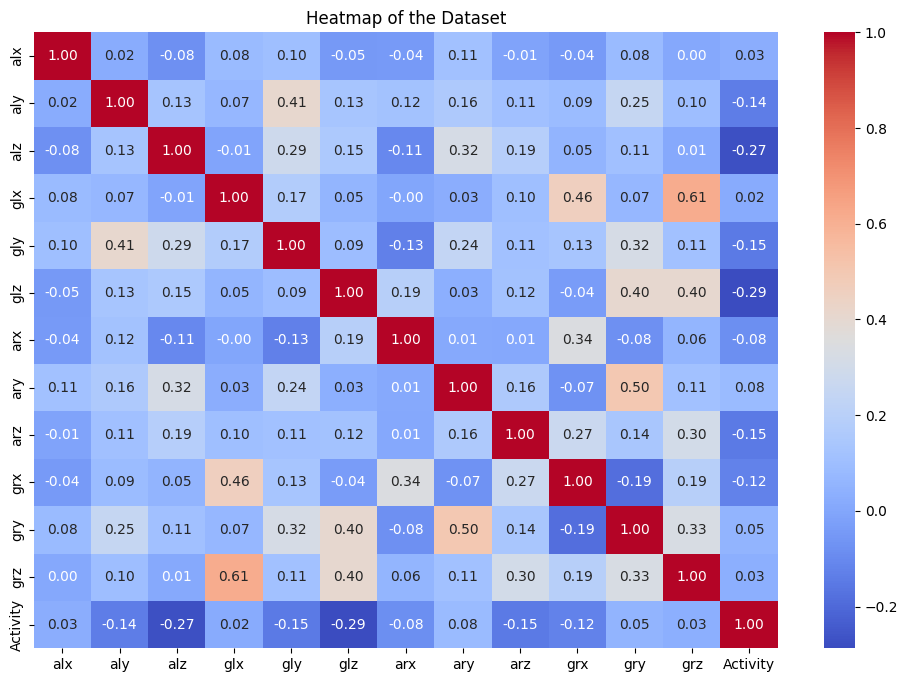

In [ ]:
numeric_columns = sampled_data.select_dtypes(include=['int', 'float'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of the Dataset')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sampled_data=sampled_data.drop('subject', axis=1)
# Separate features and target
X = sampled_data.drop('Activity', axis=1)
y = sampled_data['Activity']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):

    y_pred = model.predict(X_test)


    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')


    print("Confusion Matrix:")
    print(conf_matrix)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)


param_grid = {
    'n_neighbors': [3, 5, 7, 9],
}


knn = KNeighborsClassifier()


grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)

best_knn = grid_search.best_estimator_


evaluate_model(best_knn, X_test, y_test)

Best Parameters: {'n_neighbors': 3}
Confusion Matrix:
[[ 824   30   16   20   87   64   56   63   73   71   20   15   27]
 [   0 1404    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 1376    0    0    0    0    0    0    0    0    0    0]
 [   1    0    0 1388    0    0    0    0    0    0    0    0    0]
 [   7    0    0    0 1442    3    0    0    0    0    0    0    1]
 [  17    2    0    0   30 1366    3    2   17    0    0    0    4]
 [   3    0    0    0    0    0 1404   12    3    0    0    0    0]
 [   9    0    0    0    0    0    5 1379    3    0    0    0    0]
 [   7    0    0    0    0    0    0    5 1354    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 1447    0    0    0]
 [   8    0    0    0    4    1    0    0    0    0 1286   61   19]
 [  13    0    0    0    9    2    0    0    0    0  107 1237   15]
 [  31    0    0    0   12    5    0    4    2    0   58   31 1235]]
Accuracy: 0.9418681318681319
Precision: 0.9411050468398245
Re

In [ ]:
from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='accuracy')


print("Cross-validation scores:", cv_scores)


mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("Mean Cross-validation Score:", mean_cv_score)
print("Standard Deviation of Cross-validation Score:", std_cv_score)

Cross-validation scores: [0.93866758 0.93914835 0.93846154 0.93962912 0.93825549]
Mean Cross-validation Score: 0.9388324175824175
Standard Deviation of Cross-validation Score: 0.0004964096428459503


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_log = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5, scoring='accuracy')
grid_search_log.fit(X_train, y_train)

best_params = grid_search_log.best_params_

best_log_reg = LogisticRegression(max_iter=5000, **best_params)
best_log_reg.fit(X_train, y_train)

cv_scores = cross_val_score(best_log_reg, X_train, y_train, cv=5, scoring='accuracy')
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print(f"\nCross-validation scores: {cv_scores}, Mean Cross-validation Score: {mean_cv_score}, STD of Cross-validation Score: {std_cv_score}")

y_pred_best = best_log_reg.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

print("\nBest hyperparameters:", best_params)
print("\nConfusion Matrix:")
print(conf_matrix_best)
print("\nAccuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1-score:", f1_best)



Cross-validation scores: [0.53495879 0.53804945 0.54244505 0.53866758 0.54182692], Mean Cross-validation Score: 0.5391895604395603, STD of Cross-validation Score: 0.002721236706251009

Best hyperparameters: {'C': 1}

Confusion Matrix:
[[  55  168  136   27  118   34  145  117  135  142   89   60  140]
 [   0  911    0    0  151    0  258    0   84    0    0    0    0]
 [   0    0  754    0    0  127    0  169    0  174    0    0  152]
 [   0    0    0 1389    0    0    0    0    0    0    0    0    0]
 [  29  168    7    0  735  179  102    2  161    0    1   42   27]
 [  90  101   80    6  268  391  106   44  225   26   17   19   68]
 [  64  300    1    0   52    0  845    2  158    0    0    0    0]
 [  27  157  173    0   35    3   83  814    9   53    0    1   41]
 [  18  112    0    0  112  155  168    1  710    7   40    6   37]
 [   0    0    0    0    2    1    0   35   97 1311    0    0    1]
 [  27    0   61    0    8   16    5   15   16    0  706  291  234]
 [  36    3  128

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC

def evaluate_svm_model(svm, X_test, y_test):

    svm_pred = svm.predict(X_test)


    accuracy = accuracy_score(y_test, svm_pred)
    precision = precision_score(y_test, svm_pred, average='weighted')
    recall = recall_score(y_test, svm_pred, average='weighted')
    f1 = f1_score(y_test, svm_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, svm_pred)


    print("Confusion Matrix:")
    print(conf_matrix)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("\n")


C_values = [0.1, 1, 10]
gamma_values = [0.01, 0.1, 1]


for C in C_values:
    for gamma in gamma_values:

        svm = SVC(kernel='rbf', C=C, gamma=gamma)


        svm.fit(X_train, y_train)


        print(f"SVM Metrics with C={C} and gamma={gamma}:")
        evaluate_svm_model(svm, X_test, y_test)


SVM Metrics with C=0.1 and gamma=0.01:
Confusion Matrix:
[[ 121  204  191   29  115   52  170   99   91  127   89   42   36]
 [   0 1255    0    0    0    0  149    0    0    0    0    0    0]
 [   0    0 1376    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 1389    0    0    0    0    0    0    0    0    0]
 [   1  167    0    0  918  120   85    0  146    0    0   10    6]
 [  32  138   81    0  285  524   89    7  268    0    3    3   11]
 [  13  365    0    0   13    1 1015    5   10    0    0    0    0]
 [   3  150  168    0   24    4   82  929    0   36    0    0    0]
 [   6  161    0    0   54  131  232    2  772    8    0    0    0]
 [  24    4    1    0    3    1    0   28   27 1359    0    0    0]
 [   9    1   19    0    5    3    0    5    5    0  772  373  187]
 [   8    1    9    0   13    5    0    4    2    0   78 1215   48]
 [  44   13   34    0   67   11   32    5   20    2  206  221  723]]
Accuracy: 0.6795604395604395
Precision: 0.6788182207033001

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


X = sampled_data.drop('Activity', axis=1)
y = sampled_data['Activity']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])


pipeline.fit(X_train, y_train)


y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Alternatively, calculate Root Mean Squared Error (RMSE)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print("Train Mean Squared Error (MSE):", train_mse)
print("Test Mean Squared Error (MSE):", test_mse)
print("Train Root Mean Squared Error (RMSE):", train_rmse)
print("Test Root Mean Squared Error (RMSE):", test_rmse)


Train Mean Squared Error (MSE): 10.68108130032233
Test Mean Squared Error (MSE): 10.513600309308442
Train Root Mean Squared Error (RMSE): 3.2681923597490905
Test Root Mean Squared Error (RMSE): 3.242468243377018


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, ReLU, LeakyReLU, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


input_layer = Input(shape=(X_train.shape[1],))


dense1 = Dense(units=32)(input_layer)
activation1 = ReLU()(dense1)
dropout1 = Dropout(0.25)(activation1)

dense2 = Dense(units=64)(dropout1)
activation2 = LeakyReLU()(dense2)
dropout2 = Dropout(0.25)(activation2)


output_layer = Dense(units=y_train.nunique(), activation="softmax")(dropout2)


model = Model(inputs=input_layer, outputs=output_layer)

optimizer = Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


model.summary()


history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

def evaluate_model(model, X_test, y_test):

    y_pred = model.predict(X_test)
    y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes, average='weighted')
    recall = recall_score(y_test, y_pred_classes, average='weighted')
    f1 = f1_score(y_test, y_pred_classes, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Confusion Matrix:")
    print(conf_matrix)


evaluate_model(model, X_test, y_test)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense (Dense)               (None, 32)                416       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dropout_1 (Dropout)         (None, 64)                0     